# ToyotaCorolla Assignment 

In [2]:
# libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs

#  Data loading

In [10]:
ToyotaCorolla = pd.read_csv("D:\Data Science Material\Assignments\Multi Linear Regression assignment\ToyotaCorolla.csv",encoding='ISO-8859-1')
ToyotaCorolla.head()
# data load

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [12]:
ToyotaCorolla = ToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
# only needed data selection

In [14]:
ToyotaCorolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [15]:
ToyotaCorolla.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [16]:
ToyotaCorolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [18]:
ToyotaCorolla_car = ToyotaCorolla.copy()    # copying data to secure old data

In [19]:
ToyotaCorolla_car.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# EDA 

In [20]:
ToyotaCorolla_car.isna().sum()  # null values, here no null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [21]:
ToyotaCorolla_car.duplicated()  # duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [24]:
ToyotaCorolla_car.value_counts()   # how many times value is repeate

Price  Age_08_04  KM      HP   cc    Doors  Gears  Quarterly_Tax  Weight
24950  8          13253   116  2000  5      5      234            1320      2
4350   44         158320  69   1800  5      5      64             1110      1
10950  54         71725   110  1600  4      5      69             1035      1
       57         80470   110  1600  5      5      85             1085      1
                  61682   110  1600  3      5      69             1050      1
                                                                           ..
8950   54         149329  72   2000  5      5      185            1135      1
                  64000   97   1400  3      5      69             1025      1
                  61000   69   2000  5      5      185            1140      1
       53         115113  97   1400  3      5      69             1025      1
32500  4          1       116  2000  5      5      283            1480      1
Length: 1435, dtype: int64

In [26]:
ToyotaCorolla_car.dtypes   # data type of dataset

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [27]:
ToyotaCorolla_car.info()   # all cols is in int64 so no need to convert it , data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [30]:
ToyotaCorolla_car.shape  # no of rows and cols

(1436, 9)

In [38]:
ToyotaCorolla_car.Price.values  # all values of perticuler cols

array([13500, 13750, 13950, ...,  8500,  7250,  6950], dtype=int64)

In [39]:
ToyotaCorolla_car.Age_08_04.values    # all values of perticuler cols

array([23, 23, 24, ..., 71, 70, 76], dtype=int64)

In [40]:
ToyotaCorolla_car.KM.values       # all values of perticuler cols

array([46986, 72937, 41711, ..., 17016, 16916,     1], dtype=int64)

In [41]:
ToyotaCorolla_car.HP.values      # all values of perticuler cols

array([ 90,  90,  90, ...,  86,  86, 110], dtype=int64)

In [42]:
ToyotaCorolla_car.Doors.values    # all values of perticuler cols

array([3, 3, 3, ..., 3, 3, 5], dtype=int64)

In [43]:
ToyotaCorolla_car.Doors.values     # all values of perticuler cols

array([3, 3, 3, ..., 3, 3, 5], dtype=int64)

In [44]:
ToyotaCorolla_car.Gears.values     # all values of perticuler cols

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [45]:
ToyotaCorolla_car.Quarterly_Tax.values    # all values of perticuler cols

array([210, 210, 210, ...,  69,  69,  19], dtype=int64)

In [46]:
ToyotaCorolla_car.Weight.values   # all values of perticuler cols

array([1165, 1165, 1165, ..., 1015, 1015, 1114], dtype=int64)

In [48]:
# mean
ToyotaCorolla_car.mean()

Price            10730.824513
Age_08_04           55.947075
KM               68533.259749
HP                 101.502089
cc                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [50]:
# median
ToyotaCorolla_car.median()

Price             9900.0
Age_08_04           61.0
KM               63389.5
HP                 110.0
cc                1600.0
Doors                4.0
Gears                5.0
Quarterly_Tax       85.0
Weight            1070.0
dtype: float64

In [51]:
# standard deviation
ToyotaCorolla_car.std()

Price             3626.964585
Age_08_04           18.599988
KM               37506.448872
HP                  14.981080
cc                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

In [52]:
# variance
ToyotaCorolla_car.var()

Price            1.315487e+07
Age_08_04        3.459596e+02
KM               1.406734e+09
HP               2.244327e+02
cc               1.801041e+05
Doors            9.075927e-01
Gears            3.553619e-02
Quarterly_Tax    1.691563e+03
Weight           2.771088e+03
dtype: float64

In [53]:
# kurtosis
ToyotaCorolla_car.kurtosis()

Price              3.737781
Age_08_04         -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

In [54]:
# mode 
ToyotaCorolla_car.mode

<bound method DataFrame.mode of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

In [66]:
ToyotaCorolla_car.sort_values(by=['Price'],ascending=False)    # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
115,24990,8,6000,90,2000,5,5,234,1280
113,24950,8,13253,116,2000,5,5,234,1320
...,...,...,...,...,...,...,...,...,...
402,5150,56,113997,72,2000,5,5,64,1135
192,4750,44,131273,69,1800,5,5,64,1110
393,4450,56,129155,69,1800,5,5,64,1110
1048,4400,74,203254,72,2000,3,5,64,1135


In [67]:
ToyotaCorolla_car.sort_values(by=['Age_08_04'],ascending=False)   # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1137,6500,80,105135,110,1600,3,5,69,1050
1182,9900,80,92255,107,1600,5,5,85,1105
1367,8950,80,58000,110,1600,3,5,85,1055
1325,6750,80,66168,86,1300,3,5,69,1015
1369,8250,80,57787,86,1300,3,5,69,1015
...,...,...,...,...,...,...,...,...,...
110,31000,4,4000,116,2000,5,5,283,1480
182,21125,2,225,97,1400,5,5,85,1110
183,21500,2,15,110,1600,5,5,85,1130
184,17795,1,1,98,1400,4,5,19,1100


In [68]:
ToyotaCorolla_car.sort_values(by=['KM'],ascending=False)    # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
186,6950,43,243000,69,1900,3,5,185,1110
1044,5900,73,232940,72,2000,5,5,40,1172
1045,6950,79,218118,72,2000,5,5,185,1150
1046,6000,78,217764,72,2000,5,5,185,1135
378,6500,53,216000,69,1900,3,5,185,1110
...,...,...,...,...,...,...,...,...,...
184,17795,1,1,98,1400,4,5,19,1100
169,17795,9,1,98,1400,4,5,19,1065
170,18245,9,1,110,1600,5,5,19,1075
601,7500,50,1,90,2000,3,5,64,1260


In [69]:
ToyotaCorolla_car.sort_values(by=['HP'],ascending=False)    # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195
141,23950,19,21684,192,1800,5,5,19,1185
...,...,...,...,...,...,...,...,...,...
480,11500,48,63000,69,1900,5,5,185,1140
216,13500,33,75699,69,1900,3,5,185,1105
406,10950,51,103018,69,1900,5,5,185,1140
210,13250,41,81106,69,1900,5,5,185,1140


In [70]:
ToyotaCorolla_car.sort_values(by=['cc'],ascending=False)    # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
0,13500,23,46986,90,2000,3,5,210,1165
1108,8250,71,120474,72,2000,3,5,185,1115
1092,7250,71,127159,72,2000,3,5,185,1115
1085,7950,79,131500,72,2000,5,5,185,1140
...,...,...,...,...,...,...,...,...,...
850,8100,68,65400,86,1300,4,5,69,1000
732,10500,60,85000,86,1300,3,5,69,1025
1253,6950,77,77000,86,1300,3,5,19,1015
1036,8950,62,25505,86,1300,5,5,69,1035


In [71]:
ToyotaCorolla_car.sort_values(by=['Doors'],ascending=False)     # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
718,9950,63,89000,110,1600,5,5,85,1085
928,9950,63,55942,110,1600,5,5,85,1070
739,9800,68,83000,107,1600,5,5,85,1100
742,9750,58,82254,110,1600,5,5,69,1050
745,8450,68,81965,86,1300,5,5,69,1035
...,...,...,...,...,...,...,...,...,...
842,10500,61,66259,110,1600,3,6,85,1065
243,13500,33,57711,90,2000,3,5,210,1165
0,13500,23,46986,90,2000,3,5,210,1165
761,8250,65,80000,86,1300,2,5,19,1015


In [72]:
ToyotaCorolla_car.sort_values(by=['Gears'],ascending=False)     # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
827,9650,67,69000,110,1600,3,6,85,1065
873,9750,68,62292,110,1600,3,6,85,1065
444,11750,48,75045,110,1600,3,6,85,1055
811,9500,59,71366,110,1600,3,6,85,1065
838,9950,59,67010,110,1600,3,6,85,1065
...,...,...,...,...,...,...,...,...,...
478,10500,54,63135,110,1600,3,5,69,1050
477,9930,53,63635,110,1600,4,5,69,1035
1426,9950,78,30964,110,1600,3,4,85,1080
956,10950,58,51421,110,1600,5,3,85,1105


In [73]:
ToyotaCorolla_car.sort_values(by=['Quarterly_Tax'],ascending=False)   # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
115,24990,8,6000,90,2000,5,5,234,1280
113,24950,8,13253,116,2000,5,5,234,1320
...,...,...,...,...,...,...,...,...,...
170,18245,9,1,110,1600,5,5,19,1075
169,17795,9,1,98,1400,4,5,19,1065
1133,8750,71,106150,86,1300,3,5,19,1015
373,13250,33,16512,97,1400,5,5,19,1085


In [74]:
ToyotaCorolla_car.sort_values(by=['Weight'],ascending=False)     # showing result with high to low order forthis column

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
110,31000,4,4000,116,2000,5,5,283,1480
960,9390,66,50806,86,1300,3,5,19,1480
109,32500,4,1,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
...,...,...,...,...,...,...,...,...,...
1268,8950,69,75000,86,1300,4,5,69,1000
605,5950,68,194545,86,1300,4,5,69,1000
957,8950,61,51235,86,1300,4,5,69,1000
1410,8500,78,43622,86,1300,4,5,69,1000


In [76]:
ToyotaCorolla_car.isna().sum()    # no null values now in the dataset

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Outlier detection and visualization

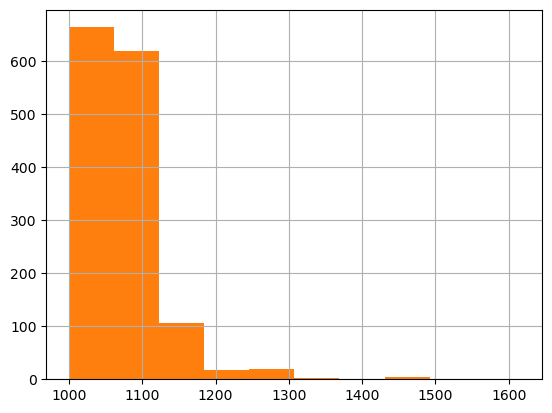

In [78]:
# histogram
ToyotaCorolla_car['Weight'].hist()
plt.show()

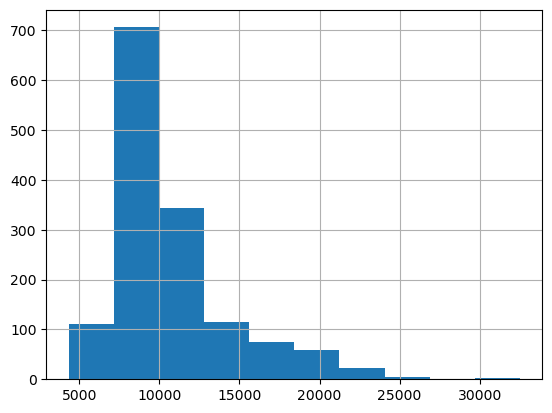

In [79]:
# histogram
ToyotaCorolla_car['Price'].hist()
plt.show()

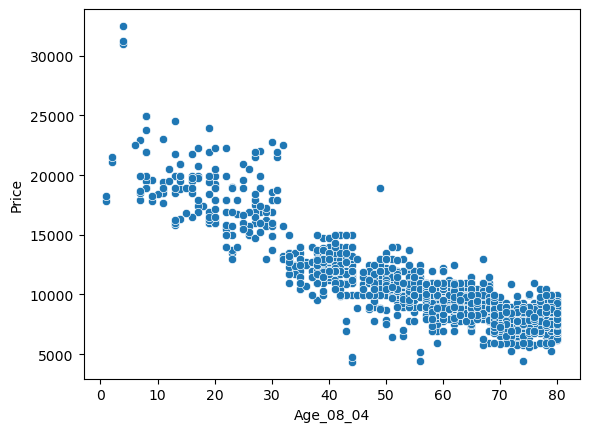

In [81]:
# scatter plot
sns.scatterplot(x = 'Age_08_04', y = 'Price', data=ToyotaCorolla_car)  
plt.show()

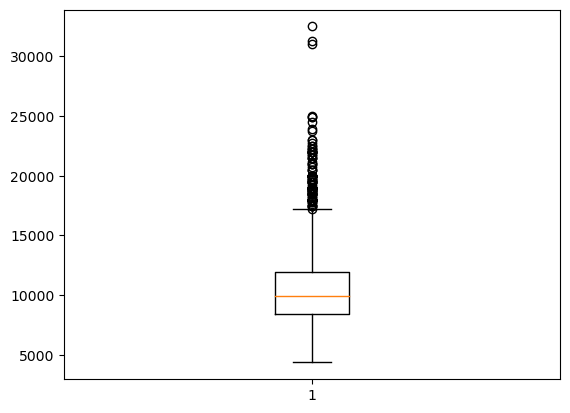

In [93]:
# boxplot
plt.boxplot(ToyotaCorolla_car['Price'],vert = True)
plt.show()

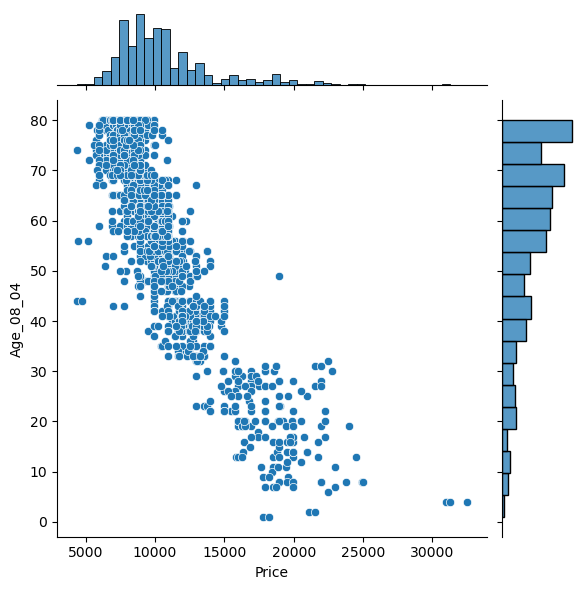

In [101]:
# joint plot , scatter and bar plt
sns.jointplot(x= 'Price', y= 'Age_08_04', data=ToyotaCorolla_car)
plt.show()

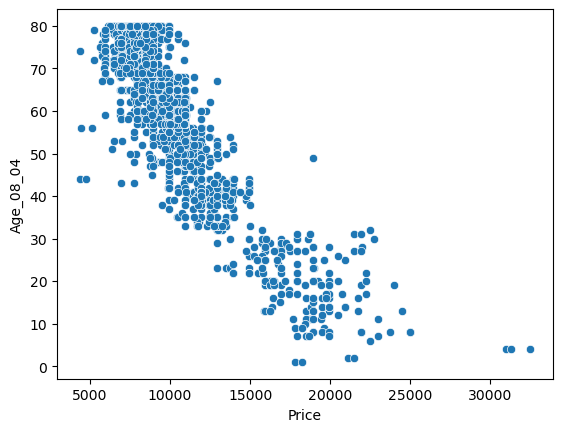

In [102]:
sns.scatterplot(x= 'Price', y= 'Age_08_04', data=ToyotaCorolla_car)
plt.show()

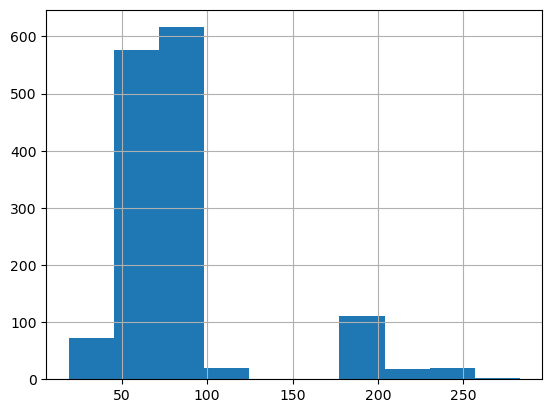

In [105]:
# histogram
ToyotaCorolla_car['Quarterly_Tax'].hist()
plt.show()

# Correlation Matrix


In [106]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 
#Note: The correlation of a variable with itself is 1
ToyotaCorolla_car.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Preparing a model

In [107]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla_car).fit()

In [108]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [109]:
#t and p-Values  # The p-value is answering the question with a certain confidence level.
#If your P value is less than the chosen significance level then you reject the null hypothesis
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [110]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


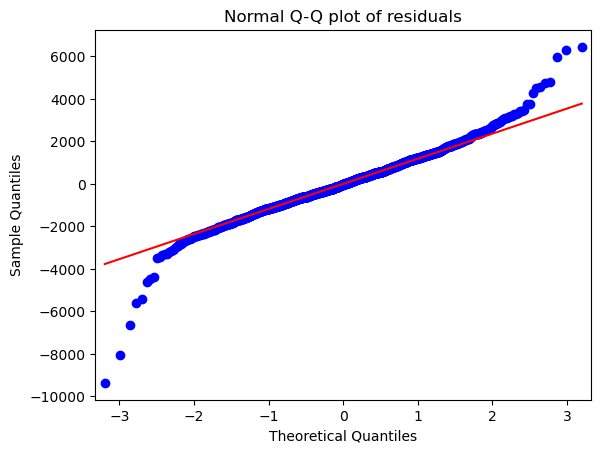

In [111]:
# qq plot , When the quantiles of two variables are plotted against each other, 
# then the plot obtained is known as quantile – quantile plot or qqplot. 
# This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [112]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

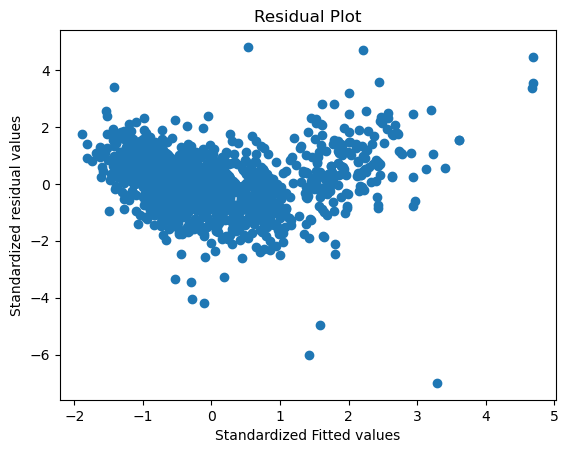

In [113]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

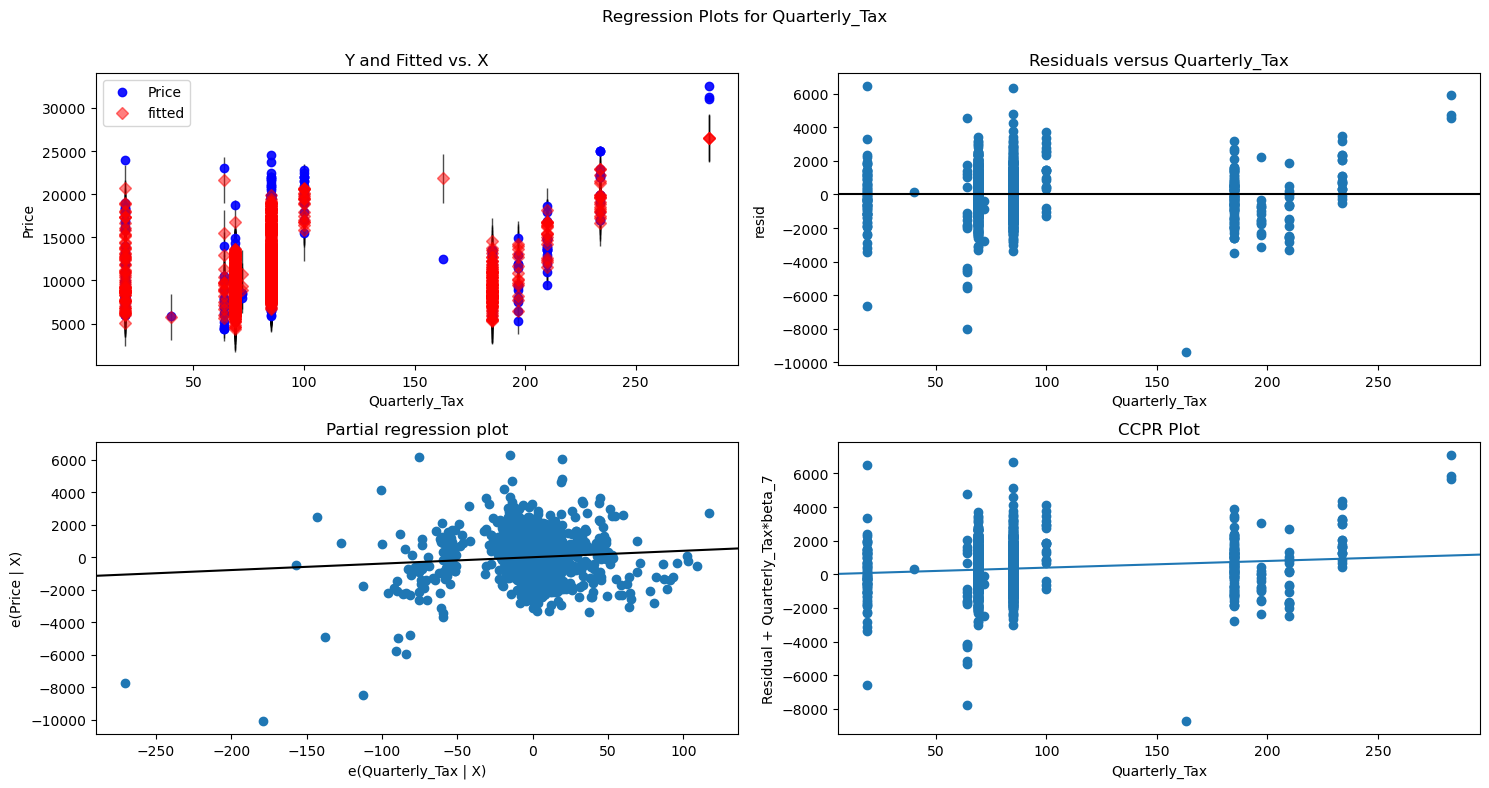

In [114]:
# regression plot and rsidual plot 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

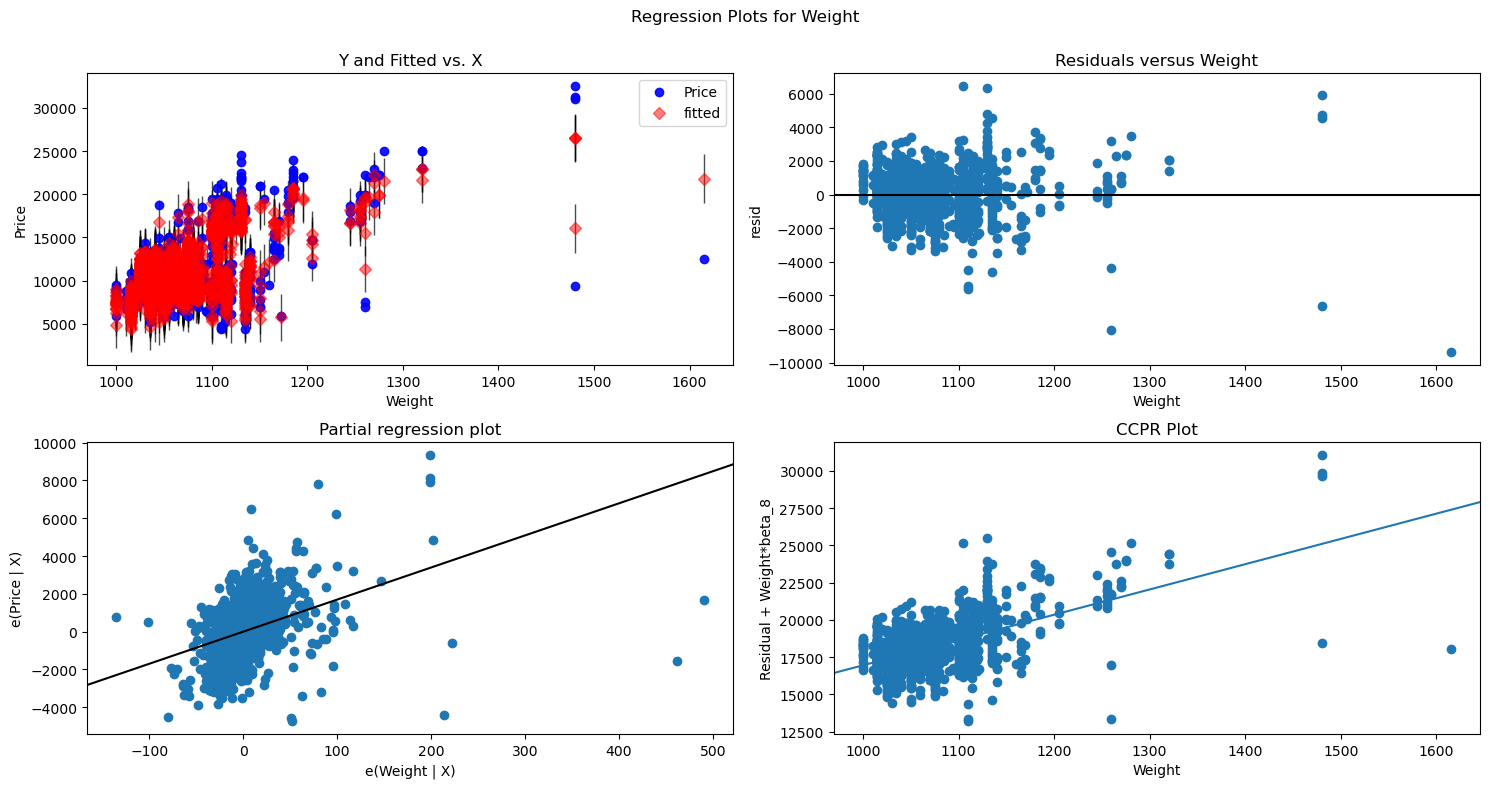

In [115]:
# regression plot and rsidual plot 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

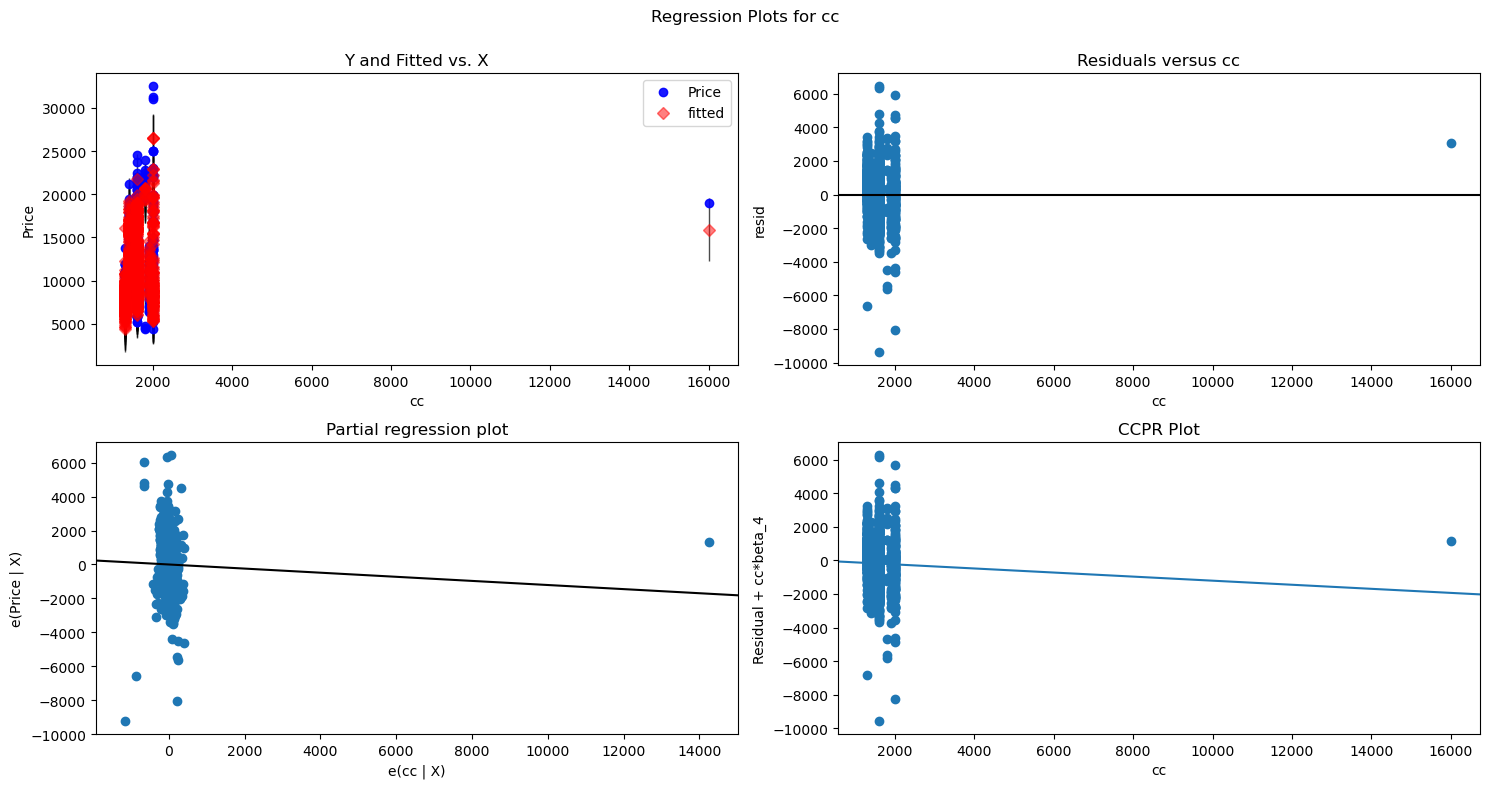

In [116]:
# regression plot and rsidual plot 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook’s Distance

In [121]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

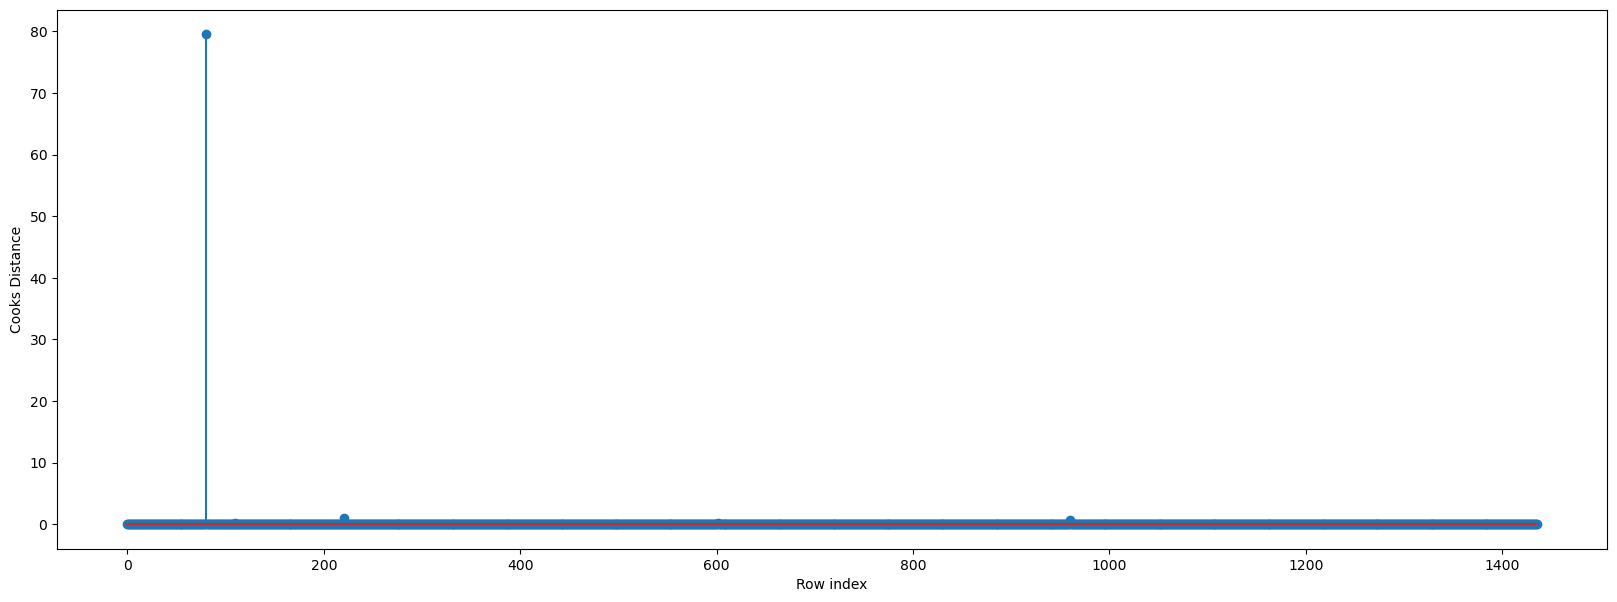

In [122]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(ToyotaCorolla_car)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# Build Model

In [131]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',data = ToyotaCorolla_car).fit()

In [132]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8373589519170618, 25019.460788198754)

In [135]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age_08_04+HP+cc+Gears+Weight',data = ToyotaCorolla_car).fit()

In [136]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8372275464632392, 25018.6205325917)

# prediction 

In [139]:
final_ml_V.predict(ToyotaCorolla_car)

0       16353.433129
1       16353.433129
2       16207.821264
3       15916.597534
4       15411.147400
            ...     
1431     7499.698737
1432     6908.868489
1433     7054.480354
1434     7200.092219
1435     8796.165082
Length: 1436, dtype: float64